In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [45]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [46]:
#Renaming the coulmns for easy usage
df.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

In [47]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [48]:
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,120,114,4
1,Albania,212,169,10
2,Algeria,511,449,31
3,Andorra,334,327,6
4,Angola,7,5,2


In [49]:
figure = px.choropleth(world, locations="country", 
                    locationmode='country names', color="active", 
                    hover_name="country", range_color=[1,1000], 
                    color_continuous_scale="Peach", 
                    title='Countries with Active Cases')
figure.show()

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

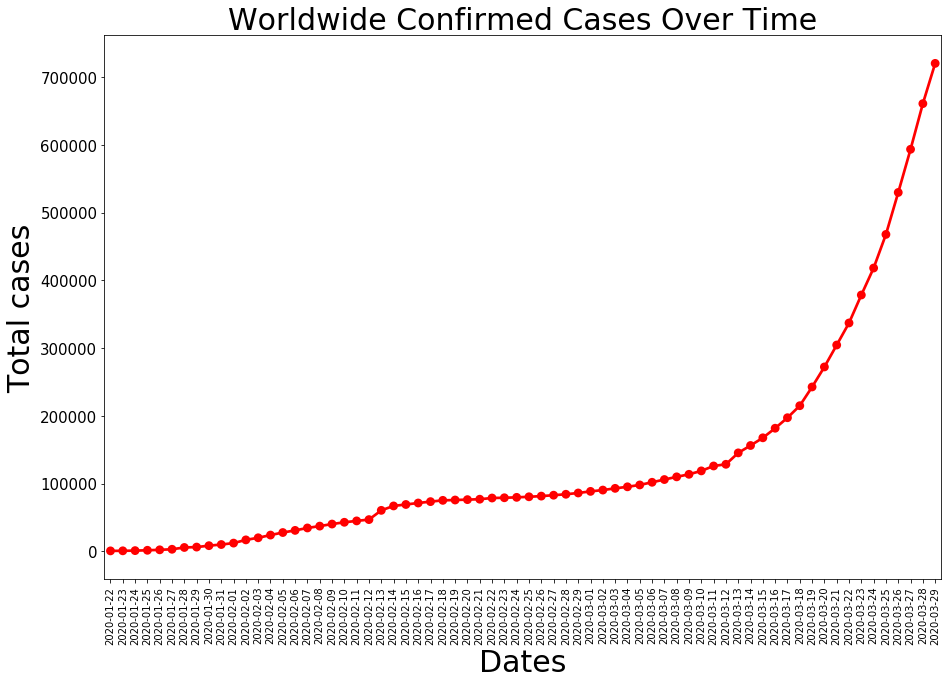

In [50]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [51]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

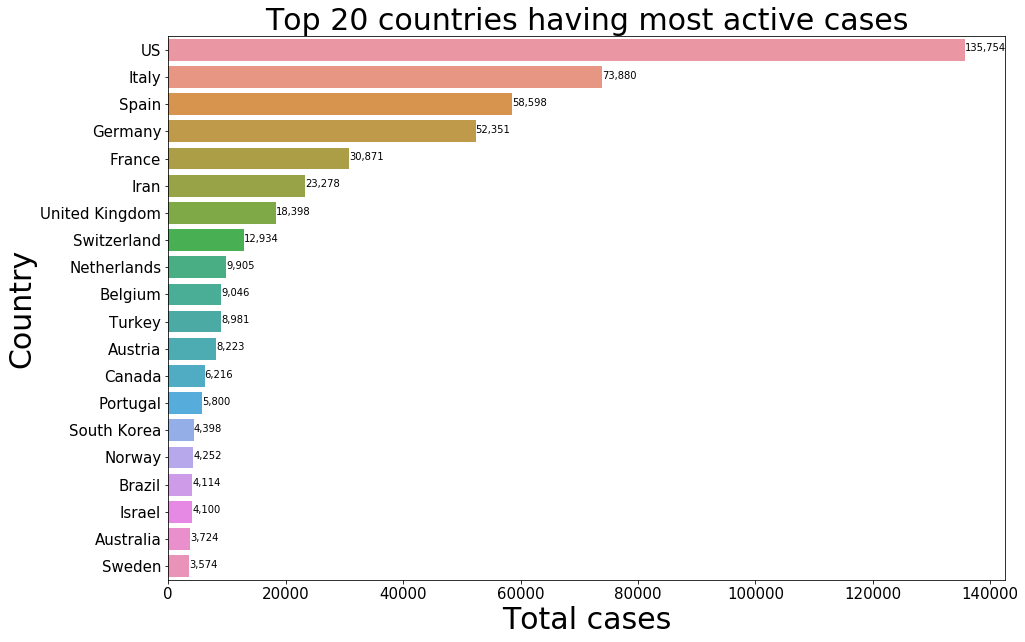

In [52]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [53]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

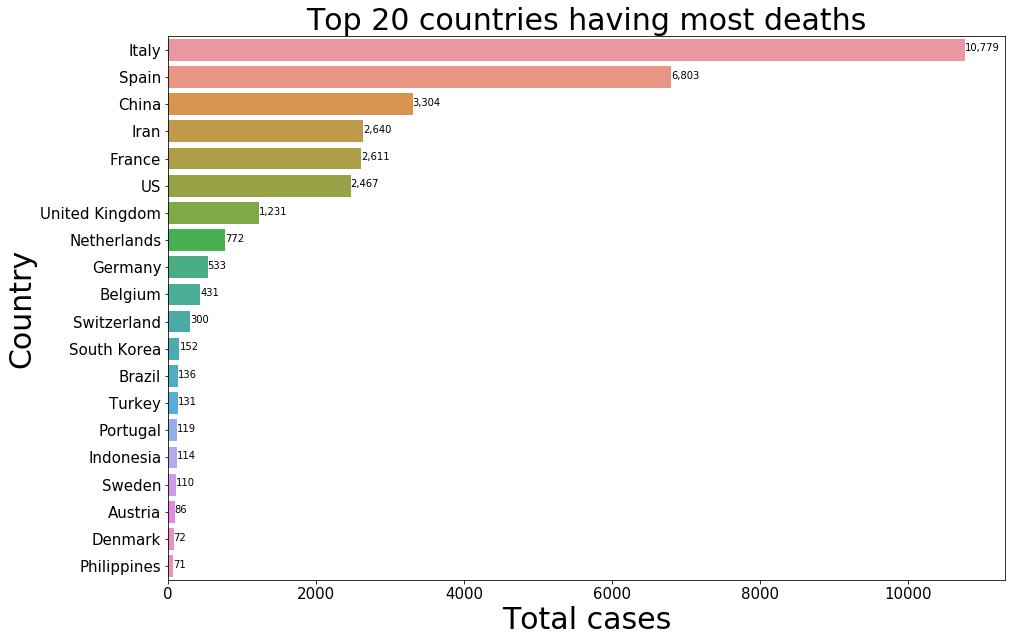

In [54]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most deaths" , fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [55]:
recovery = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
recovery

,country,recovered
0,China,75582
1,Spain,14709
2,Italy,13030
3,Iran,12391
4,Germany,9211
5,France,7226
6,South Korea,5033
7,US,2665
8,Switzerland,1595
9,Belgium,1359


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

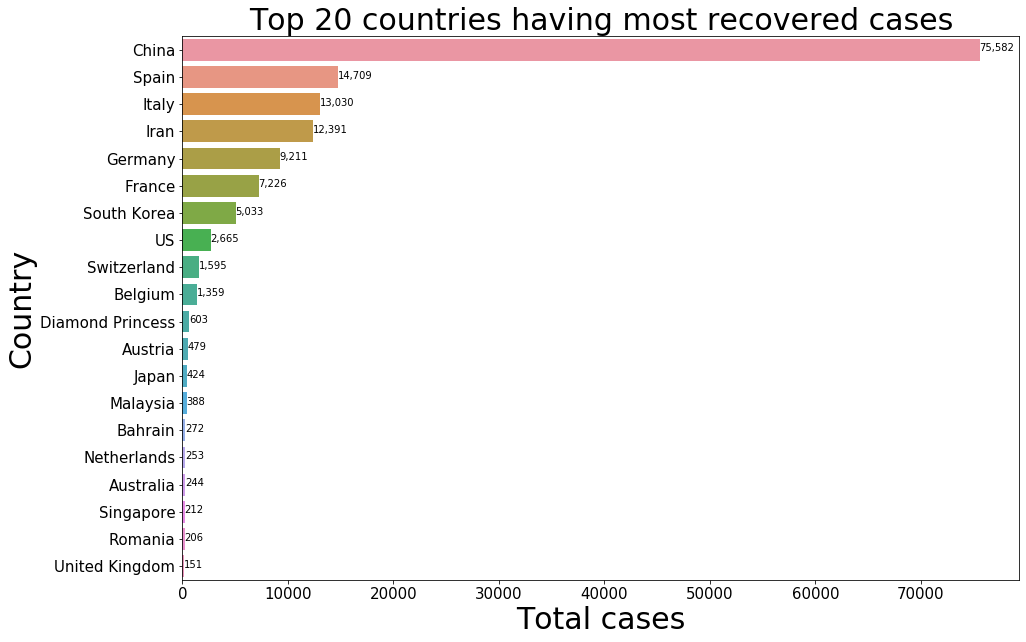

In [56]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most recovered cases" , fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [57]:
china =  df[df.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()

In [58]:
us =  df[df.country == 'US']
us = us.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)

In [59]:
italy =  df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)

In [60]:
india =  df[df.country == 'India']
india = india.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)

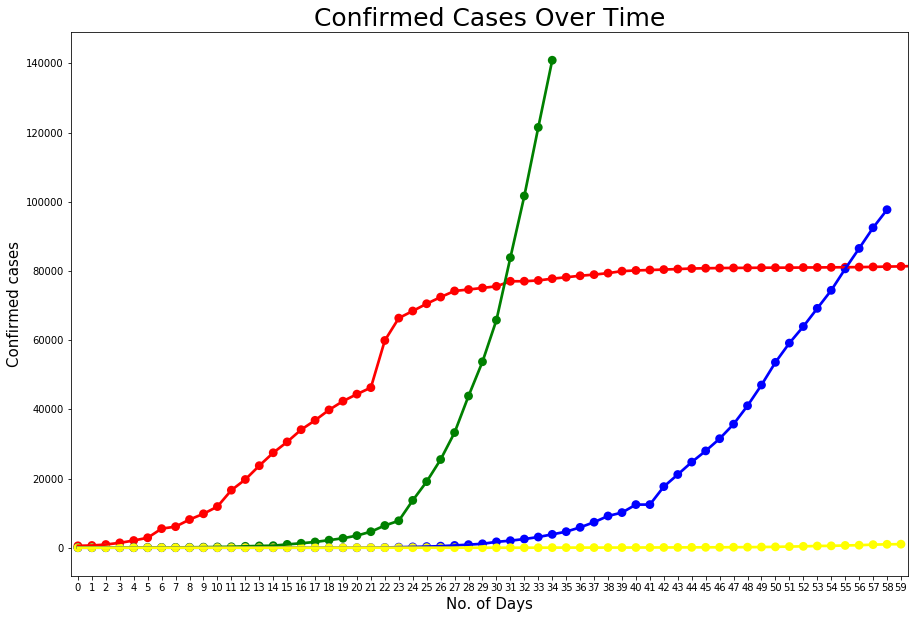

In [61]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index ,china.confirmed, color="Red")
sns.pointplot(us.index ,us.confirmed, color="Green")
sns.pointplot(italy.index ,italy.confirmed, color="Blue")
sns.pointplot(india.index ,india.confirmed, color="Yellow")

plt.title("Confirmed Cases Over Time" , fontsize = 25)
plt.ylabel('Confirmed cases', fontsize = 15)
plt.xlabel('No. of Days', fontsize = 15)
plt.show()

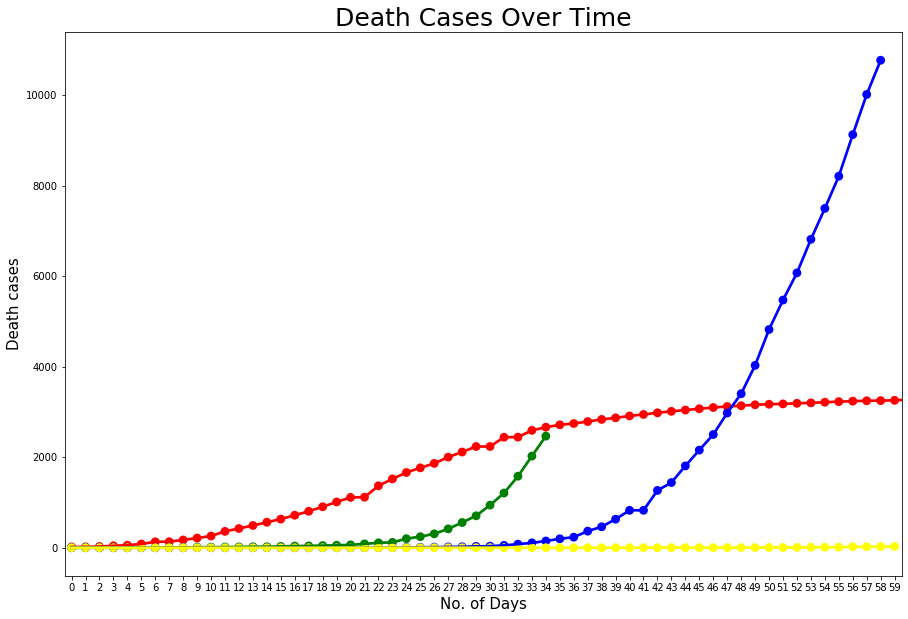

In [62]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index ,china.deaths, color="Red")
sns.pointplot(us.index ,us.deaths, color="Green")
sns.pointplot(italy.index ,italy.deaths, color="Blue")
sns.pointplot(india.index ,india.deaths, color="Yellow")

plt.title("Death Cases Over Time" , fontsize = 25)
plt.ylabel('Death cases', fontsize = 15)
plt.xlabel('No. of Days', fontsize = 15)
plt.show()

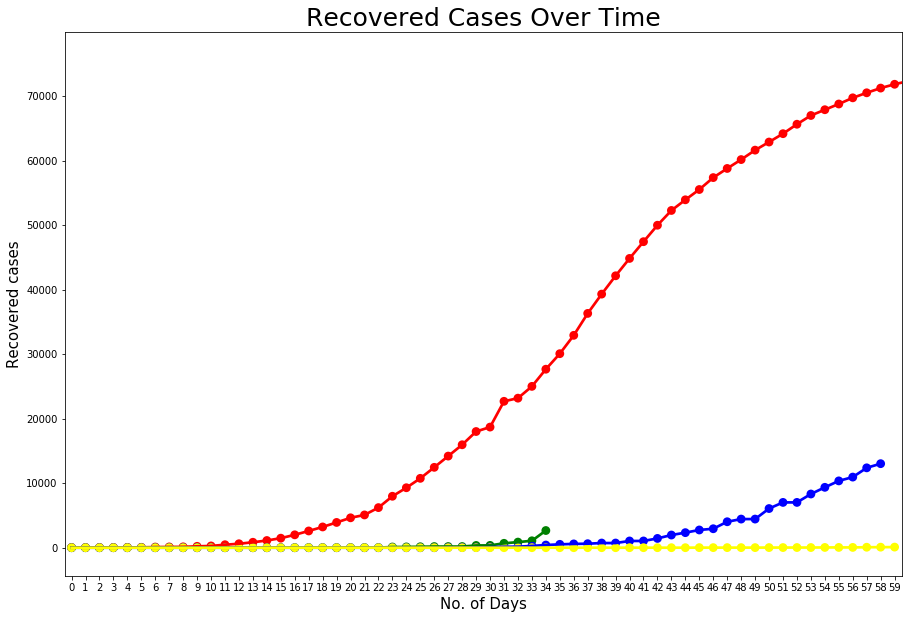

In [63]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index ,china.recovered, color="Red")
sns.pointplot(us.index ,us.recovered, color="Green")
sns.pointplot(italy.index ,italy.recovered, color="Blue")
sns.pointplot(india.index ,india.recovered, color="Yellow")

plt.title("Recovered Cases Over Time" , fontsize = 25)
plt.ylabel('Recovered cases', fontsize = 15)
plt.xlabel('No. of Days', fontsize = 15)
plt.show()